# Fraud Detection

A first look at the data set and seeing if any data cleaning or information can be be derived from the data. [Here](https://www.kaggle.com/ntnu-testimon/paysim1) was where the file was found.

The central question that is being asked is, can fraud be detected? If so, what are the traits of a fraudluous account?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import cufflinks as cf
cf.go_offline()

Output hidden; open in https://colab.research.google.com to view.

In [2]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
df = pd.read_csv('./drive/My Drive/Projects/Fraud-Detection/data/PS_20174392719_1491204439457_log.csv')

## Removing unwanted data

We can remove the nameOrig and nameDest column as they provide information that will not be useful in my analysis of the data. There cannot be any relationship between the id and wheter fraud occured.

In [0]:
df.drop(['nameOrig','nameDest'], axis = 1, inplace = True)

## Looking at the type of data in each column

The step column is a column in which each increment of 1 represents 1 unit of time has passed

In [5]:
df.head(15)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,170136.00,160296.36,0.0,0.00,0,0
1,1,PAYMENT,1864.28,21249.00,19384.72,0.0,0.00,0,0
2,1,TRANSFER,181.00,181.00,0.00,0.0,0.00,1,0
3,1,CASH_OUT,181.00,181.00,0.00,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,41554.00,29885.86,0.0,0.00,0,0
5,1,PAYMENT,7817.71,53860.00,46042.29,0.0,0.00,0,0
6,1,PAYMENT,7107.77,183195.00,176087.23,0.0,0.00,0,0
7,1,PAYMENT,7861.64,176087.23,168225.59,0.0,0.00,0,0
8,1,PAYMENT,4024.36,2671.00,0.00,0.0,0.00,0,0
9,1,DEBIT,5337.77,41720.00,36382.23,41898.0,40348.79,0,0


We can try and convert the transaction types to numbers for greater clarity on the data

In [6]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

payment = 1

transfer = 2

cash_out = 3

debit = 4

cash_in = 5

In [7]:
def change_payment_type(word):
  if(word == 'PAYMENT'):
    return 1
  elif(word == 'TRANSFER'):
    return 2
  elif(word == 'CASH_OUT'):
    return 3
  elif(word == 'DEBIT'):
    return 4
  else:
    return 5
  
df['type'] = df['type'].apply(change_payment_type)
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,1,2,181.00,181.0,0.00,0.0,0.0,1,0
3,1,3,181.00,181.0,0.00,21182.0,0.0,1,0
4,1,1,11668.14,41554.0,29885.86,0.0,0.0,0,0


We shall look at what percentage of fraud cases were correctly flagged

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
step              int64
type              int64
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud           int64
isFlaggedFraud    int64
dtypes: float64(5), int64(4)
memory usage: 436.9 MB


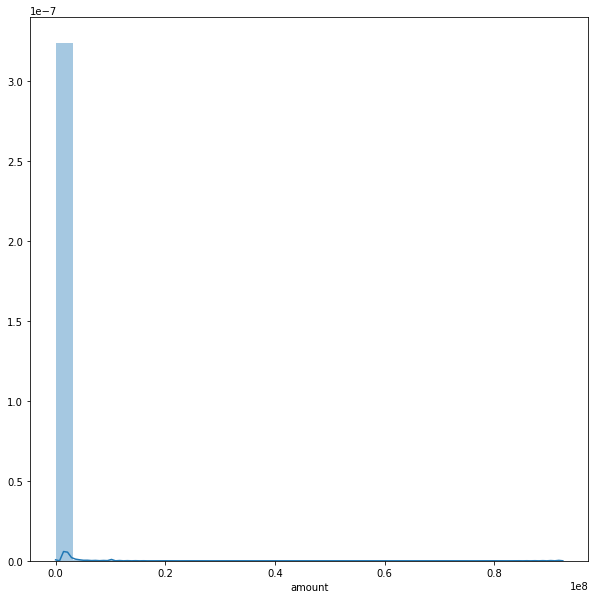

In [9]:
plt.figure(figsize = (10,10))
sns.distplot(df['amount'], bins = 30)

In [10]:
df[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']].describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06
std,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05
75%,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06
max,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08


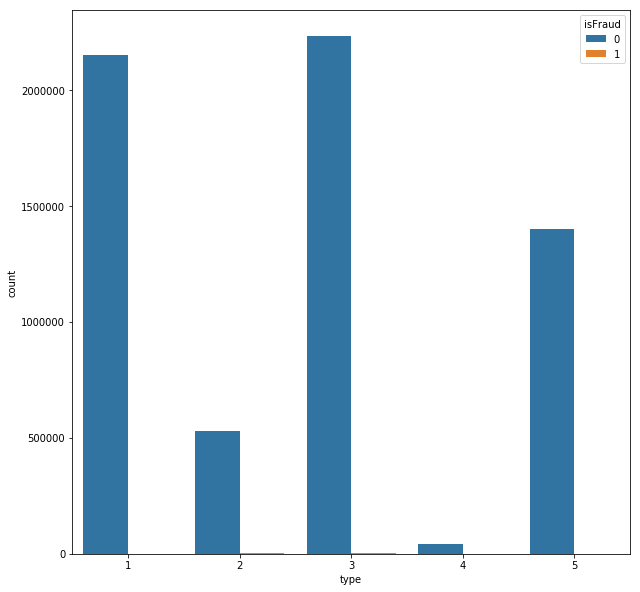

In [11]:
plt.figure(figsize = (10,10))
sns.countplot(x = 'type', data = df, hue = 'isFraud')

Thus fraud mostly occurs on transaction types 2 and 3 which represent transfer and cash out payments

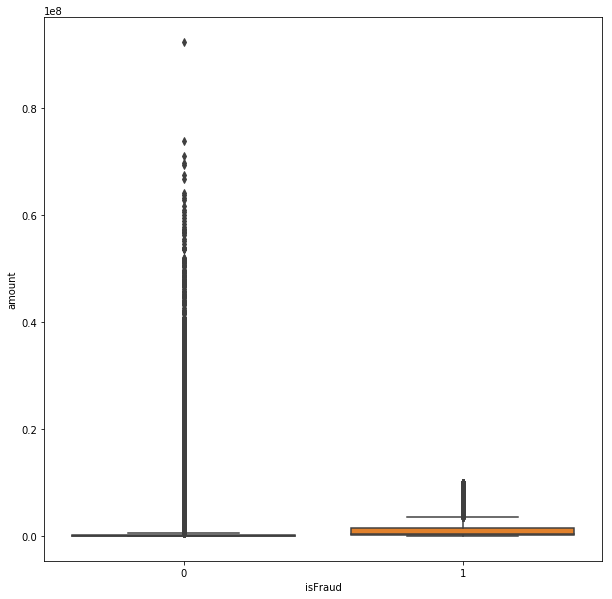

In [12]:
plt.figure(figsize = (10,10))
sns.boxplot(y = df['amount'], x = df['isFraud'])

We are going to eliminate transactions that were greater than 0.2 * 10^8

In [0]:
df = df[df['amount'] < 0.2 *(10**8)]

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6361792 entries, 0 to 6362619
Data columns (total 9 columns):
step              int64
type              int64
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud           int64
isFlaggedFraud    int64
dtypes: float64(5), int64(4)
memory usage: 485.4 MB


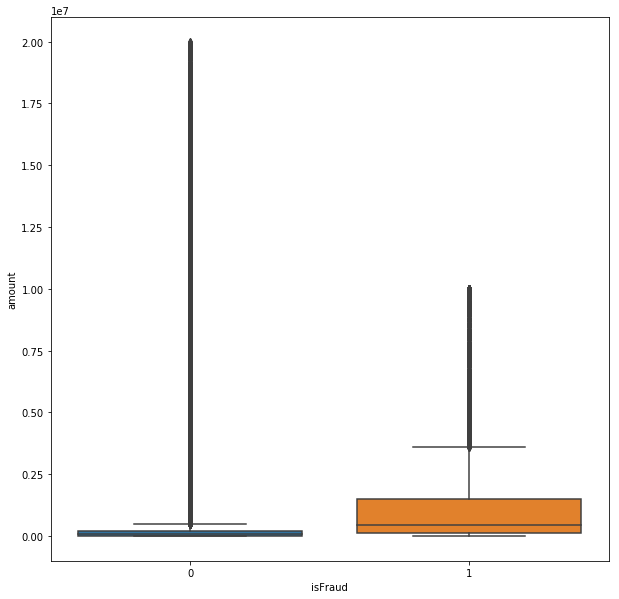

In [15]:
plt.figure(figsize = (10,10))
sns.boxplot(y = df['amount'], x = df['isFraud'])

We can continue to drop some more data so that this looks even more neat, i am going to get rid of transactions greater than 0.5 * 10^7

In [0]:
df = df[df['amount'] < 0.5 *(10**7)]

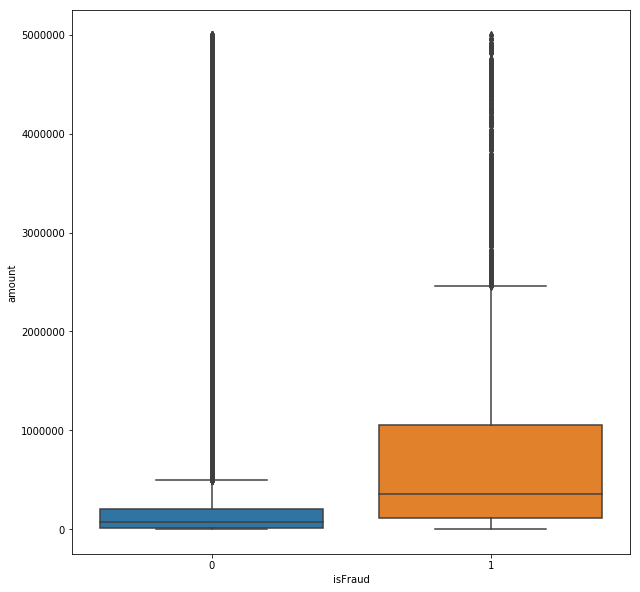

In [17]:
plt.figure(figsize = (10,10))
sns.boxplot(y = df['amount'], x = df['isFraud'])

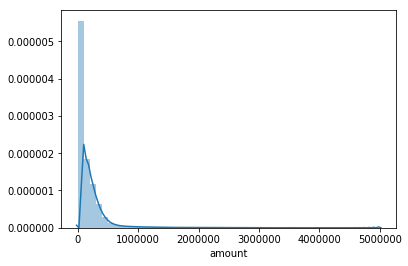

In [18]:
sns.distplot(df['amount'])

In [0]:
df = df[df['amount'] < 2.5 * 10**6]

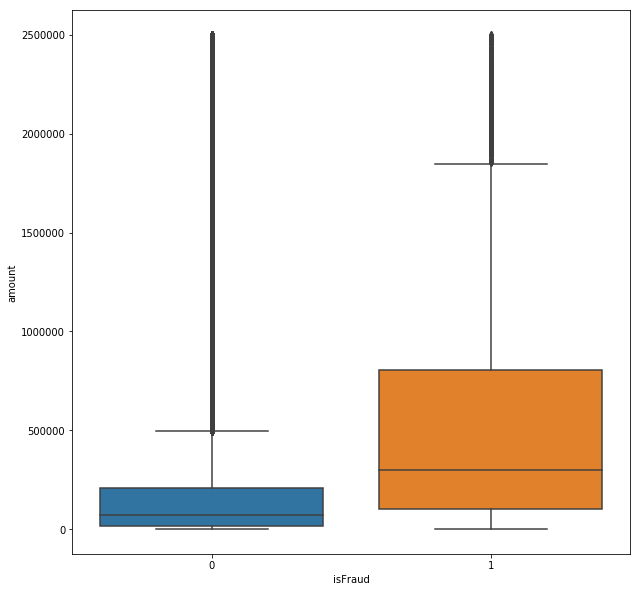

In [20]:
plt.figure(figsize = (10,10))
sns.boxplot(y = df['amount'], x = df['isFraud'])

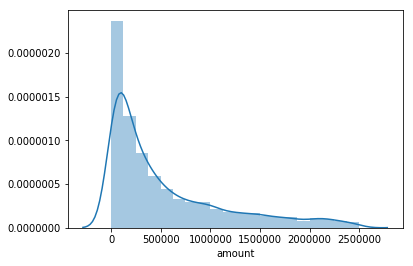

In [21]:
sns.distplot(df[df['isFraud'] == 1]['amount'], bins=20)

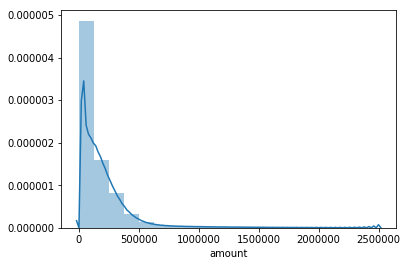

In [22]:
sns.distplot(df[df['isFraud'] == 0]['amount'], bins=20)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6332083 entries, 0 to 6362619
Data columns (total 9 columns):
step              int64
type              int64
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud           int64
isFlaggedFraud    int64
dtypes: float64(5), int64(4)
memory usage: 483.1 MB


In [24]:
df.describe()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.332083e+06,6.332083e+06,6.332083e+06,6.332083e+06,6.332083e+06,6.332083e+06,6.332083e+06,6.332083e+06,6.332083e+06
mean,2.430527e+02,2.689509e+00,1.516636e+05,8.361752e+05,8.589854e+05,1.063200e+06,1.154192e+06,1.079424e-03,6.317037e-07
std,1.423884e+02,1.494197e+00,2.359909e+05,2.891785e+06,2.929690e+06,3.161649e+06,3.215545e+06,3.283685e-02,7.947977e-04
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.550000e+02,1.000000e+00,1.329285e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.380000e+02,3.000000e+00,7.380531e+04,1.439700e+04,0.000000e+00,1.301007e+05,2.102439e+05,0.000000e+00,0.000000e+00
75%,3.340000e+02,3.000000e+00,2.062681e+05,1.075912e+05,1.461965e+05,9.303861e+05,1.088722e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,5.000000e+00,2.499980e+06,4.381886e+07,4.368662e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [0]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


In [0]:
X = df.drop('isFraud', axis = 1)
y = df['isFraud']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
d_tree = DecisionTreeClassifier()
d_tree.fit(X_train,y_train)
predictions = d_tree.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1897578
           1       0.87      0.84      0.85      2047

    accuracy                           1.00   1899625
   macro avg       0.93      0.92      0.93   1899625
weighted avg       1.00      1.00      1.00   1899625

